In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data=pd.read_csv("/Users/jhasija9/Documents/Data Glacier Internship/Week-4/USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.rename(columns={'Avg. Area Income':'Area_Income'}, inplace= True)
data.rename(columns={'Avg. Area House Age':'Area_House_Age'}, inplace= True)
data.rename(columns={'Avg. Area Number of Rooms': 'Area_Number_Rooms'}, inplace= True)
data.rename(columns={'Avg. Area Number of Bedrooms':'Area_Number_Bedrooms'}, inplace= True)
data.rename(columns={'Area Population':'Area_Population'}, inplace= True)

In [5]:
data.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_Income           5000 non-null   float64
 1   Area_House_Age        5000 non-null   float64
 2   Area_Number_Rooms     5000 non-null   float64
 3   Area_Number_Bedrooms  5000 non-null   float64
 4   Area_Population       5000 non-null   float64
 5   Price                 5000 non-null   float64
 6   Address               5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.isnull().sum()

Area_Income             0
Area_House_Age          0
Area_Number_Rooms       0
Area_Number_Bedrooms    0
Area_Population         0
Price                   0
Address                 0
dtype: int64

In [8]:
data=data.drop(['Address'], axis=1)
data.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
data.shape

(5000, 6)

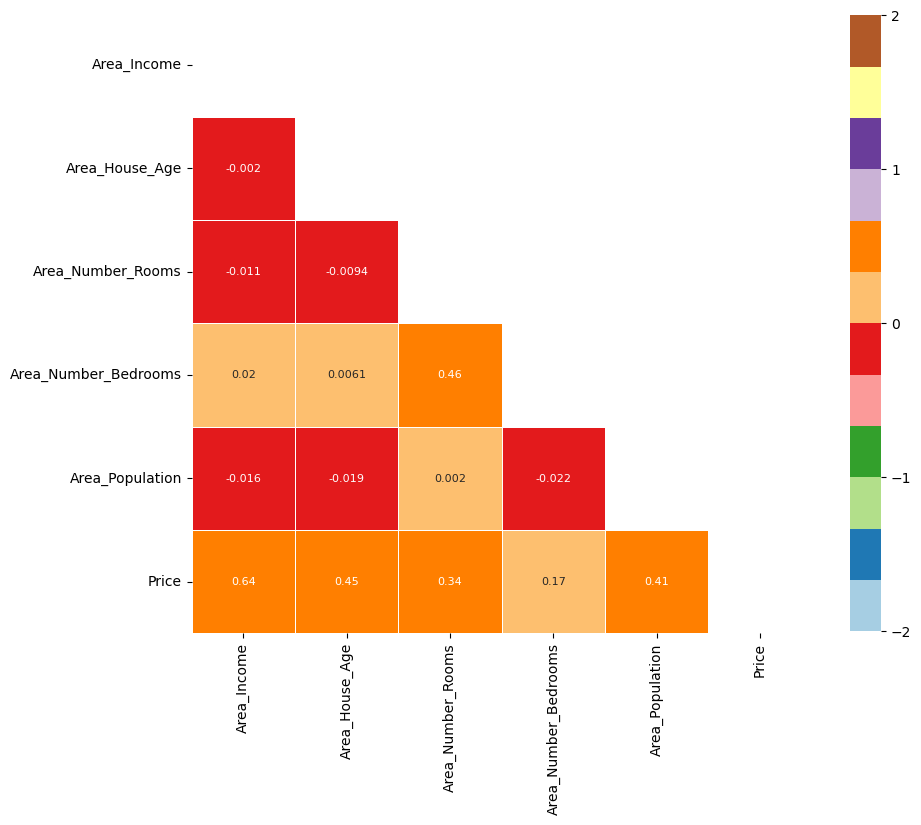

In [10]:
# Plotting heatmap 
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr,mask=mask,
                      square = True,
                      linewidths = .5,
                      cmap = "Paired",
                      cbar_kws = {'shrink': .8, 
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2, 
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});
     

# Build Model

In [11]:
from sklearn.model_selection import train_test_split
x=data.drop(['Price'], axis=1)
y=data['Price']

X_train, X_test, y_train, y_test=train_test_split(x,y, train_size=0.70, test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape)


(3500, 5) (1500, 5)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

RFR_model=RandomForestRegressor(n_estimators=100, random_state=42)
RFR_model.fit(X_train, y_train)
y_pred= RFR_model.predict(X_test)

print("R2 Value:", metrics.r2_score(y_test, y_pred))
print("Accuracy is", 100- (np.mean(np.abs((y_test - y_pred ) / y_test)) * 100))

imp=pd.Series(RFR_model.feature_importances_,index=x.columns).sort_values(ascending=False)
print("The important features are:")
print(imp)

R2 Value: 0.8877129801217885
Accuracy is 90.30626176248242
The important features are:
Area_Income             0.429871
Area_House_Age          0.236319
Area_Population         0.187462
Area_Number_Rooms       0.128552
Area_Number_Bedrooms    0.017796
dtype: float64


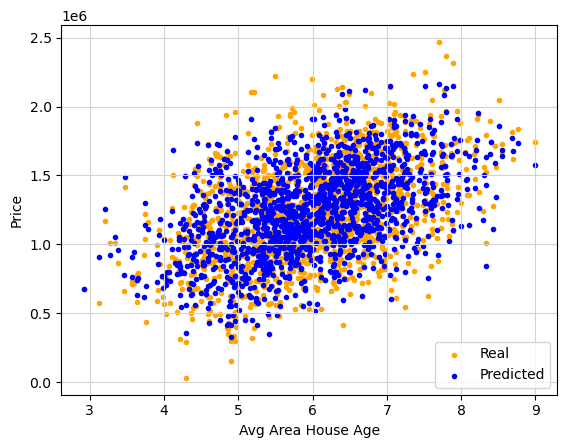

In [13]:
#graph

x_axis= X_test.Area_House_Age
plt.scatter(x_axis,y_test, marker='.', label='Real', color='orange')
plt.scatter(x_axis,y_pred, marker='.', label='Predicted', color='blue')

plt.xlabel('Avg Area House Age')
plt.ylabel('Price')

plt.grid(color ='#D3D3D3')
plt.legend(loc ='lower right')
plt.show()
     

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print("Mean Absolute Error is", mae)
print("Mean Squared Error is", mse)

Mean Absolute Error is 96530.51095594486
Mean Squared Error is 14523115014.570963


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

print("R2 Value:", metrics.r2_score(y_test, y_pred))
print("Accuracy is", 100- (np.mean(np.abs((y_test - y_pred ) / y_test)) * 100))
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print("Mean Absolute Error is", mae)
print("Mean Squared Error is", mse)
print("Model Importance is", model.coef_)
imp=pd.Series(model.coef_,index=x.columns).sort_values(ascending=False)
print("The important features are:")
print(imp)

R2 Value: 0.9200757649412042
Accuracy is 92.48855421511762
Mean Absolute Error is 81563.14733994458
Mean Squared Error is 10337337828.267801
Model Importance is [2.16187374e+01 1.66145180e+05 1.21010577e+05 1.76003780e+03
 1.51647974e+01]
The important features are:
Area_House_Age          166145.179949
Area_Number_Rooms       121010.576873
Area_Number_Bedrooms      1760.037796
Area_Income                 21.618737
Area_Population             15.164797
dtype: float64


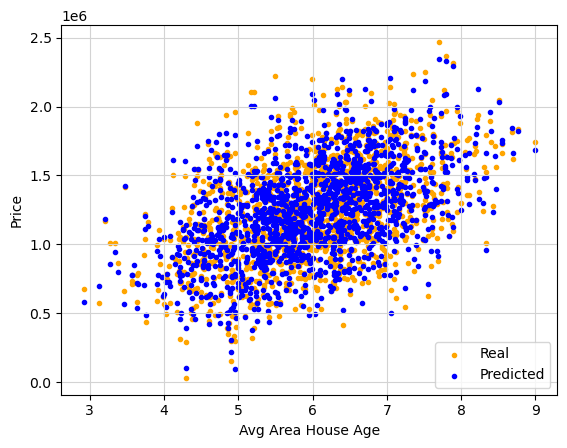

In [16]:
x_axis= X_test.Area_House_Age
plt.scatter(x_axis,y_test, marker='.', label='Real', color='orange')
plt.scatter(x_axis,y_pred, marker='.', label='Predicted', color='blue')

plt.xlabel('Avg Area House Age')
plt.ylabel('Price')

plt.grid(color ='#D3D3D3')
plt.legend(loc ='lower right')
plt.show()

In [17]:
# Make prediction
import warnings
warnings.filterwarnings('ignore')
predict = model.predict(X_test)
result = X_test.copy()
result['Price'] = y_test.values
result['Predic_Price'] = predict.tolist()
result.head()
result.reset_index()

,index,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Price,Predic_Price
0,398,61200.726175,5.299694,6.234615,4.23,42789.692217,8.942511e+05,9.696083e+05
1,3833,63380.814670,5.344664,6.001574,2.45,40217.333577,9.329794e+05,9.538682e+05
2,4836,71208.269301,5.300326,6.077989,4.01,25696.361741,9.207479e+05,9.075063e+05
3,4572,50343.763518,6.027468,5.160240,4.35,27445.876739,6.918549e+05,4.933253e+05
4,636,54535.453719,5.278065,6.871038,4.41,30852.207006,7.327332e+05,7.182212e+05
...,...,...,...,...,...,...,...,...
1495,4554,75654.777016,7.077079,6.501047,3.15,49451.178541,1.900789e+06,1.708751e+06
1496,4807,81742.851389,5.796218,7.222546,6.18,40562.498774,1.630435e+06,1.585405e+06
1497,1073,63324.581619,7.725266,6.213021,4.42,43281.572742,1.372994e+06,1.423701e+06
1498,2906,54673.521184,4.496193,7.081934,5.31,39160.553270,7.707706e+05,7.444009e+05


In [18]:
#saving the model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))